# Trips to Regional Growth Centers

In [1]:
current_run_name = 'soundcast_2014'

scen1_loc = r'S:\brice\soundcast_2040_feb17_17'
scen2_loc = r'S:\Stefan\soundcast_10peak_5offpeak'

scen1_name = '2040 no tolls'
scen2_name = '2040 10-5'

In [2]:
import os
import pandas as pd
import h5py
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
table_list = ['Trip','Household']

main_centers = ['Bellevue','Redmond Downtown','Seattle Downtown',
               'Seattle First Hill/Capitol Hill','Seattle Northgate']

In [4]:
labels = pd.read_csv(r'../../../scripts/summarize/inputs/calibration/variable_labels.csv')
rgc_lookup = pd.read_csv(r'../../../scripts/summarize/inputs/rgc_taz.csv')

In [5]:
def h5_to_df(h5file, table_list, name=False):
    """
    Load h5-formatted data based on a table list. Assumes heirarchy of a set of tables.
    """
    output_dict = {}
    
    for table in table_list:
        df = pd.DataFrame()
        for field in h5file[table].keys():
            df[field] = h5file[table][field][:]
            
        output_dict[table] = df
    
    if name:
        output_dict['name'] = name
    
    return output_dict

In [6]:
def apply_lables(h5data):
    '''
    Replace daysim formatted values with human readable lablels.
    '''
    for table in table_list:
        df = labels[labels['table'] == table]
        for field in df['field'].unique():
            newdf = df[df['field'] == field]
            local_series = pd.Series(newdf['text'].values, index=newdf['value'])
            h5data[table][field] = h5data[table][field].map(local_series)
    
    return h5data

In [7]:
# Load data
all_results = {}

for run_loc, run_name in {r'..\..\..\outputs\daysim_outputs.h5':current_run_name,
                         scen1_loc+r'\outputs\daysim_outputs.h5':scen1_name,
                         scen2_loc+r'\outputs\daysim_outputs.h5':scen2_name}.iteritems():
    print run_name
    all_results[run_name] = apply_lables(h5_to_df(h5py.File(run_loc), table_list=table_list, name=run_name))

2040 10-5
soundcast_2014
2040 no tolls


In [8]:
trip_fields = ['mode','dpurp','travdist','dtaz','trexpfac','dorp']

results_df = pd.DataFrame()

for scen, values in all_results.iteritems():

    # Add geography to hhtaz
    df = pd.merge(all_results[scen]['Trip'][trip_fields], rgc_lookup, left_on='dtaz', right_on='taz')

    # # Pivot by mode and center
    df = pd.pivot_table(df, index='mode', columns='center', values='trexpfac', aggfunc='sum')

    # Calculate shares
    df = df/df.sum()
    df.loc['Total'] = (df/df.sum()).sum()
    
    df['source'] = scen
    
    results_df = results_df.append(df)

# Mode Share

In [9]:
main_results_df = results_df[[i for i in results_df.columns if i in main_centers]+['source']]

## SOV

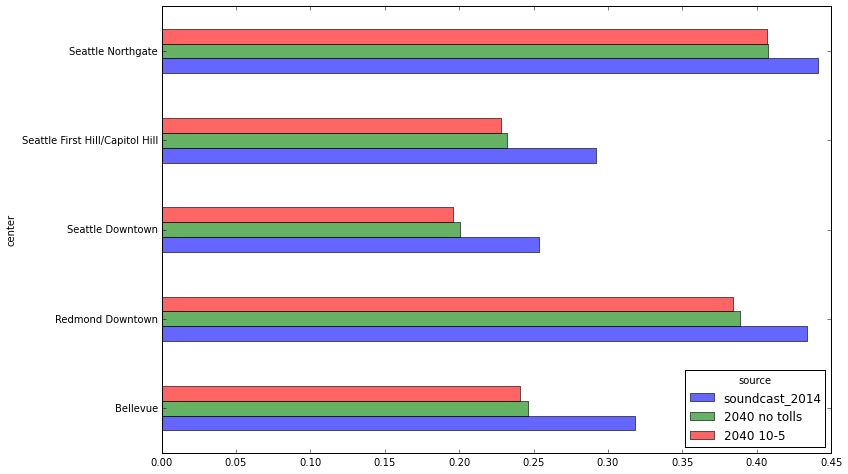

In [10]:
df = main_results_df
df['mode'] = df.index
mode = 'SOV'

df = df[df['mode'] == mode].T
df.columns = df.loc['source']
df.drop(['mode','source'],axis=0,inplace=True)
df.plot(kind='barh', alpha=0.6, figsize=(12,8))

In [11]:
df

source,soundcast_2014,2040 no tolls,2040 10-5
center,,,
Bellevue,0.318026,0.246412,0.240799
Redmond Downtown,0.434105,0.388695,0.384071
Seattle Downtown,0.253817,0.200369,0.195917
Seattle First Hill/Capitol Hill,0.292021,0.232154,0.228001
Seattle Northgate,0.441501,0.407363,0.406762


## Transit

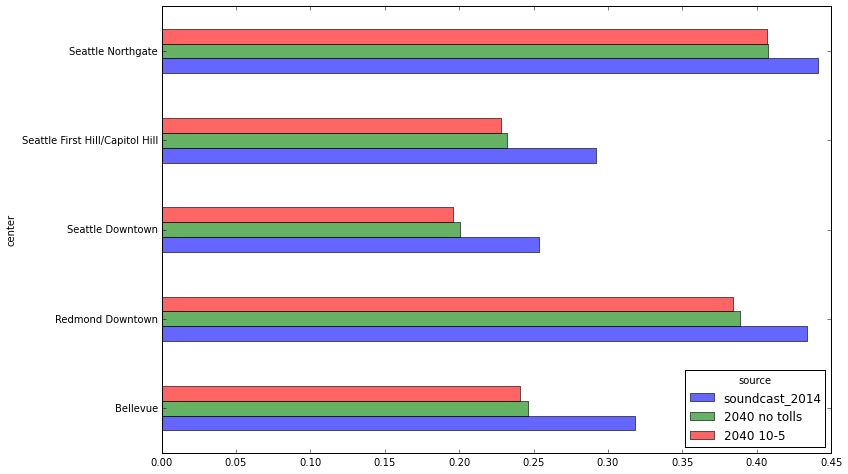

In [12]:
mode = 'SOV'
df = main_results_df
df = df[df['mode'] == mode].T
df.columns = df.loc['source']
df.drop(['mode','source'],axis=0,inplace=True)
df.plot(kind='barh', alpha=0.6, figsize=(12,8))

In [13]:
df

source,soundcast_2014,2040 no tolls,2040 10-5
center,,,
Bellevue,0.318026,0.246412,0.240799
Redmond Downtown,0.434105,0.388695,0.384071
Seattle Downtown,0.253817,0.200369,0.195917
Seattle First Hill/Capitol Hill,0.292021,0.232154,0.228001
Seattle Northgate,0.441501,0.407363,0.406762


## Walk

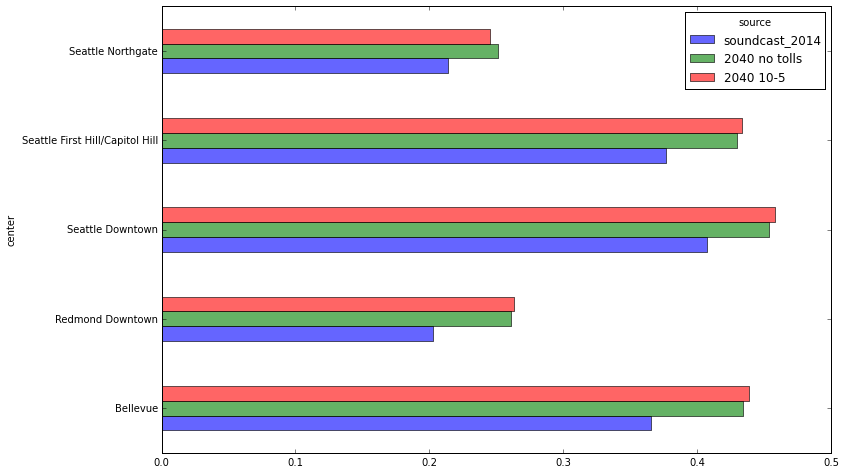

In [14]:
mode = 'Walk'
df = main_results_df
df = df[df['mode'] == mode].T
df.columns = df.loc['source']
df.drop(['mode','source'],axis=0,inplace=True)
df.plot(kind='barh', alpha=0.6, figsize=(12,8))

In [15]:
df

source,soundcast_2014,2040 no tolls,2040 10-5
center,,,
Bellevue,0.365826,0.43398,0.438476
Redmond Downtown,0.203072,0.261206,0.263318
Seattle Downtown,0.406956,0.453976,0.457899
Seattle First Hill/Capitol Hill,0.376685,0.430006,0.433542
Seattle Northgate,0.213675,0.251072,0.245556


## Bike

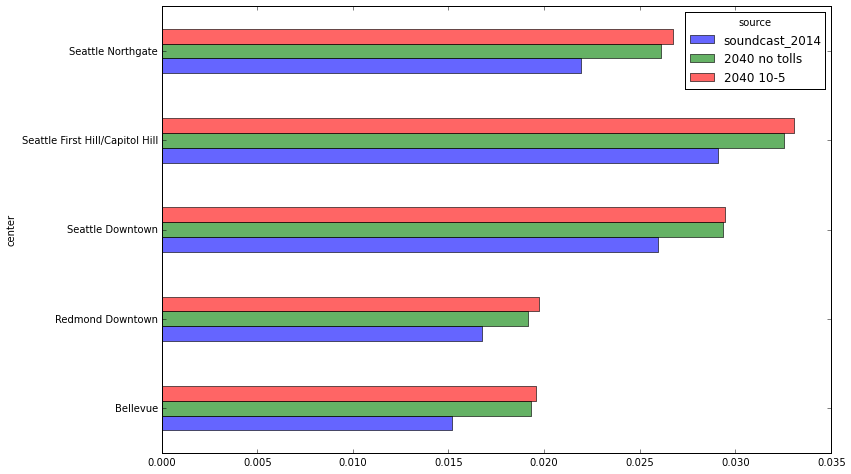

In [16]:
mode = 'Bike'
df = main_results_df
df = df[df['mode'] == mode].T
df.columns = df.loc['source']
df.drop(['mode','source'],axis=0,inplace=True)
df.plot(kind='barh', alpha=0.6, figsize=(12,8))

In [17]:
df

source,soundcast_2014,2040 no tolls,2040 10-5
center,,,
Bellevue,0.0152054,0.0193191,0.0195514
Redmond Downtown,0.0167451,0.0191611,0.0197086
Seattle Downtown,0.0259458,0.0293504,0.0294445
Seattle First Hill/Capitol Hill,0.0290944,0.0325563,0.0330841
Seattle Northgate,0.0219273,0.0261242,0.026728
